# 2.9 Visual Weather GAN

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

2024-12-19 14:44:19.691868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#download the weather images and put them in a directory
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/11-2024 ClimateWins Analysis/02 Data/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [5]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 2. CNN to Categorize Weather Images

In [7]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [9]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 10, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/10


2024-12-19 14:45:57.457481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


28/28 [==============================] - ETA: 0s - loss: 0.1385 - accuracy: 0.5397

2024-12-19 14:46:18.368583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


28/28 [==============================] - 23s 801ms/step - loss: 0.1385 - accuracy: 0.5397 - val_loss: 0.1235 - val_accuracy: 0.6161
Epoch 2/10
28/28 [==============================] - 24s 851ms/step - loss: 0.0948 - accuracy: 0.7135 - val_loss: 0.1076 - val_accuracy: 0.7321
Epoch 3/10
28/28 [==============================] - 24s 870ms/step - loss: 0.0779 - accuracy: 0.7894 - val_loss: 0.0832 - val_accuracy: 0.7946
Epoch 4/10
28/28 [==============================] - 24s 861ms/step - loss: 0.0768 - accuracy: 0.7699 - val_loss: 0.0811 - val_accuracy: 0.7902
Epoch 5/10
28/28 [==============================] - 25s 885ms/step - loss: 0.0741 - accuracy: 0.7871 - val_loss: 0.0933 - val_accuracy: 0.7500
Epoch 6/10
28/28 [==============================] - 26s 940ms/step - loss: 0.0594 - accuracy: 0.8389 - val_loss: 0.1105 - val_accuracy: 0.7232
Epoch 7/10
28/28 [==============================] - 25s 885ms/step - loss: 0.0609 - accuracy: 0.8423 - val_loss: 0.0693 - val_accuracy: 0.8125
Epoch 8/10

In [11]:
results = pd.DataFrame(model.history.history)

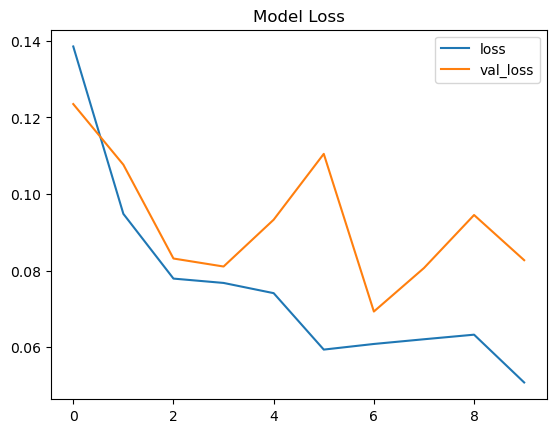

In [13]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

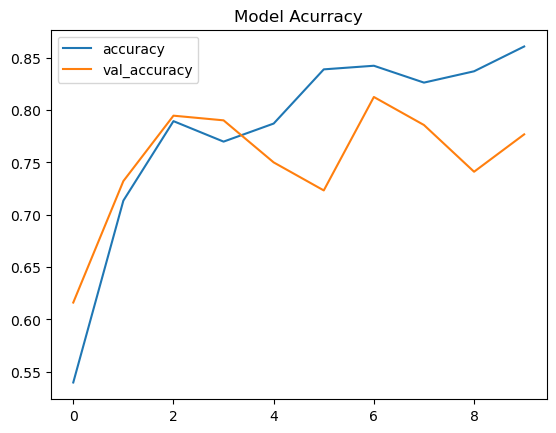

In [15]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [17]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8607594966888428, Val_Accuracy: 0.7767857313156128
Loss: 0.050827331840991974, Val_Loss: 0.08273293077945709


11/11 [==============================] - 2s 208ms/step


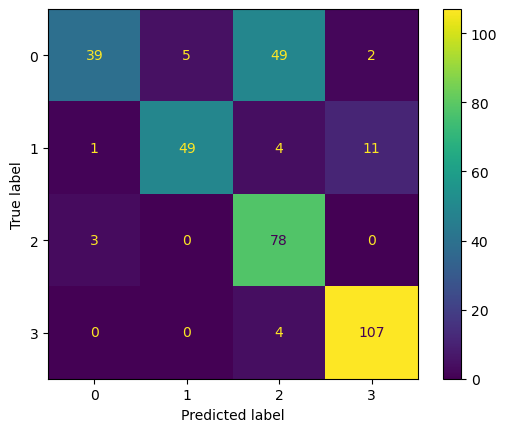

In [19]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
###

In [21]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 [==============================] - 0s 214ms/step


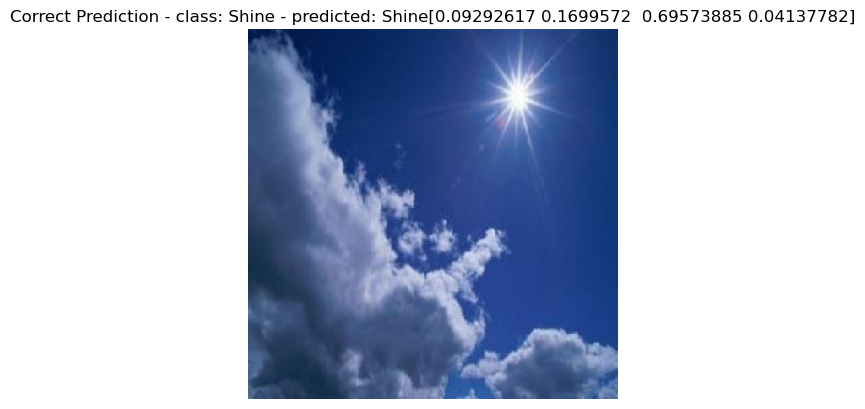

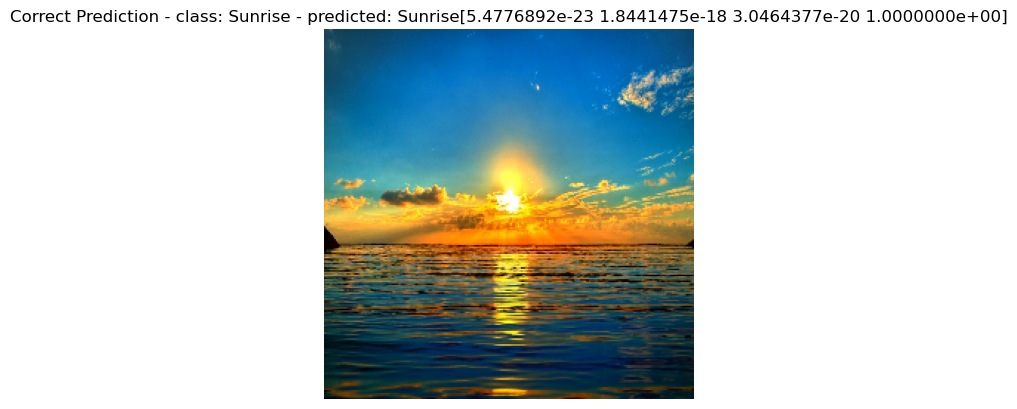

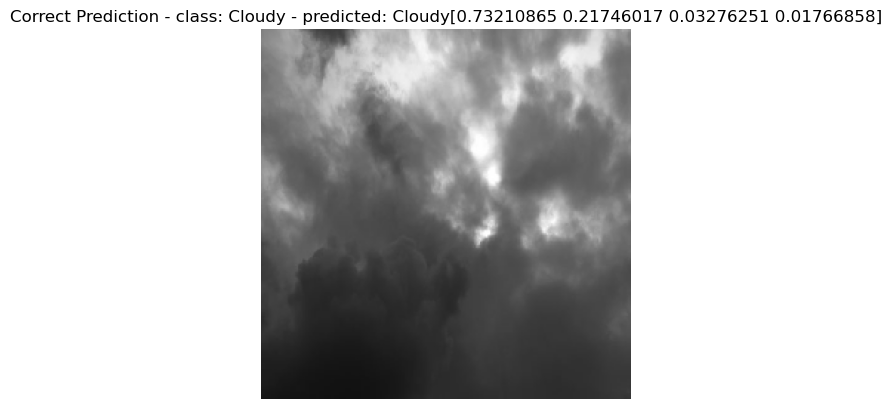

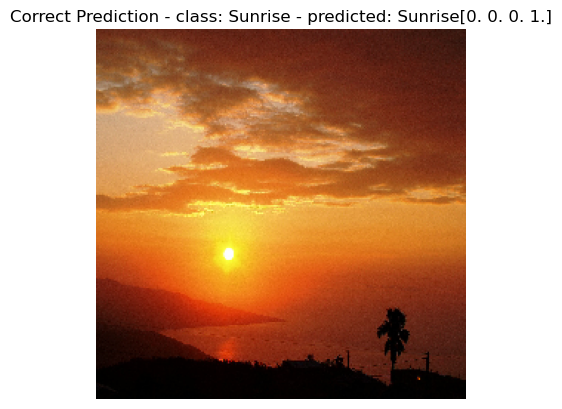

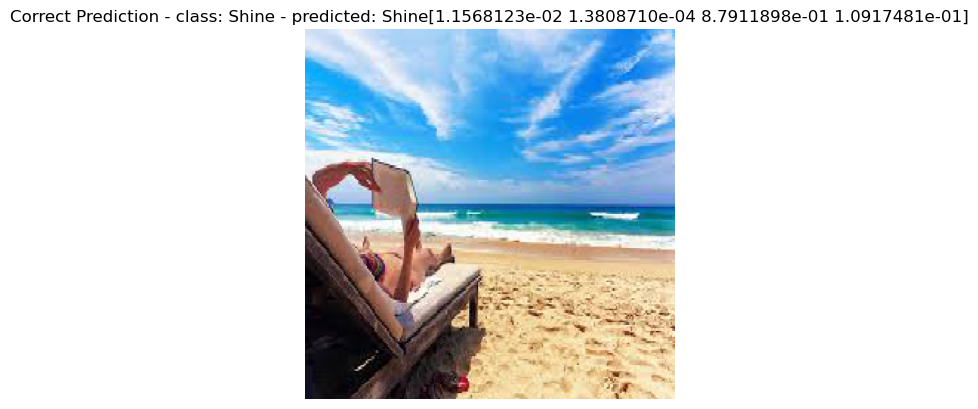

In [27]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

### Attempt with 15 epochs

In [30]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 15, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/15


2024-12-19 15:00:45.834831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


28/28 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.8320

2024-12-19 15:01:06.715465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


28/28 [==============================] - 23s 810ms/step - loss: 0.0663 - accuracy: 0.8320 - val_loss: 0.0854 - val_accuracy: 0.7946
Epoch 2/15
28/28 [==============================] - 23s 829ms/step - loss: 0.0432 - accuracy: 0.8838 - val_loss: 0.0938 - val_accuracy: 0.7634
Epoch 3/15
28/28 [==============================] - 24s 851ms/step - loss: 0.0471 - accuracy: 0.8711 - val_loss: 0.0595 - val_accuracy: 0.8527
Epoch 4/15
28/28 [==============================] - 24s 867ms/step - loss: 0.0376 - accuracy: 0.9022 - val_loss: 0.0672 - val_accuracy: 0.8438
Epoch 5/15
28/28 [==============================] - 25s 882ms/step - loss: 0.0304 - accuracy: 0.9217 - val_loss: 0.0661 - val_accuracy: 0.8348
Epoch 6/15
28/28 [==============================] - 25s 899ms/step - loss: 0.0267 - accuracy: 0.9264 - val_loss: 0.0550 - val_accuracy: 0.8393
Epoch 7/15
28/28 [==============================] - 25s 902ms/step - loss: 0.0309 - accuracy: 0.9252 - val_loss: 0.0600 - val_accuracy: 0.8482
Epoch 8/15

In [32]:
results = pd.DataFrame(model.history.history)

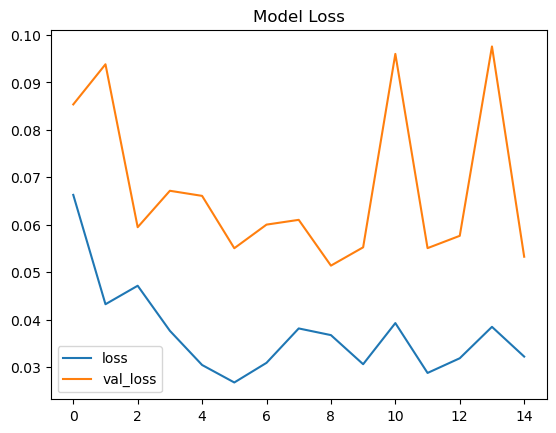

In [34]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

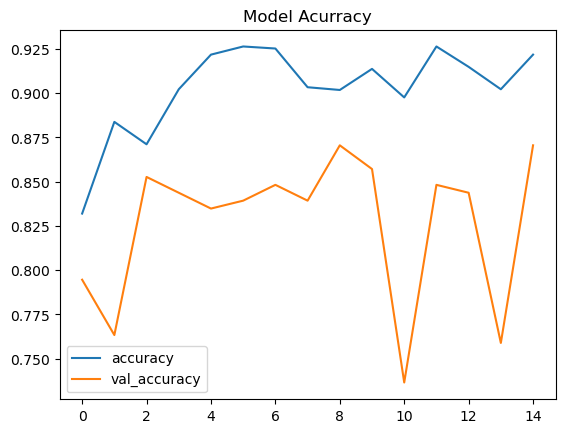

In [36]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [38]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9217491149902344, Val_Accuracy: 0.8705357313156128
Loss: 0.032193373888731, Val_Loss: 0.05325502157211304


11/11 [==============================] - 2s 208ms/step


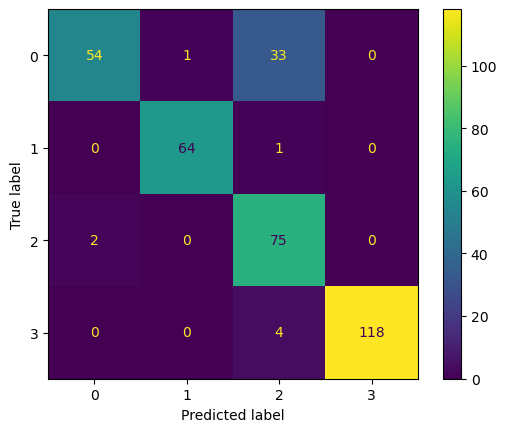

In [40]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()